In [1]:
from piece import PieceType, Piece
from tile import TileType, Tile
from team import TeamType, Team
from util.condition import Condition
from movement.mutator import Mutator
from movement.moveset import Moveset
import os

loaded = {'pieces': {}, 'tiles': {}, 'teams': {}, 'conditions': {}, 'mutators': {}, 'movesets': {}}

# get all files in games/default/data/teams and load them
for filename in os.listdir('games/default/data/teams'):
    if filename.endswith('.json'):
        team = TeamType.build('games/default/data/teams/' + filename)
        loaded['teams'][team.name] = team

# get all files in games/default/data/pieces and load them
for filename in os.listdir('games/default/data/pieces'):
    if filename.endswith('.json'):
        piece = PieceType.build('games/default/data/pieces/' + filename)
        loaded['pieces'][piece.name] = piece

# get all files in games/default/data/tiles and load them
for filename in os.listdir('games/default/data/tiles'):
    if filename.endswith('.json'):
        tile = TileType.build('games/default/data/tiles/' + filename)
        loaded['tiles'][tile.name] = tile

# get all files in games/default/data/conditions and load them
for filename in os.listdir('games/default/data/conditions'):
    if filename.endswith('.json'):
        condition = Condition.build_from_file('games/default/data/conditions/' + filename, loaded)
        loaded['conditions'][condition.name] = condition

for filename in os.listdir('games/default/data/mutators'):
    if filename.endswith('.json'):
        mutator = Mutator.build_from_file('games/default/data/mutators/' + filename, loaded)
        loaded['mutators'][mutator.name] = mutator

# get all files in games/default/data/movesets and load them
for filename in os.listdir('games/default/data/movesets'):
    if filename.endswith('.json'):
        moveset = Moveset.build_from_file('games/default/data/movesets/' + filename, loaded)
        loaded['movesets'][moveset.name] = moveset
        
# for each piece, build its movesets
for key, piece in loaded['pieces'].items():
    loaded['pieces'][key] = piece.build_movesets(loaded)

# for each tile, build its mutators
for key, tile in loaded['tiles'].items():
   loaded['tiles'][key] = tile.build_movesets(loaded)

In [2]:
from board.subboard import SubBoard

white_team = Team('white', 'default:basic', None, loaded=loaded['teams'])
black_team = Team('black', 'default:basic', None, board_color=0x000000, loaded=loaded['teams'])

teams = {
    'default:white': white_team,
    'default:black': black_team
}

tile_mappings = {f'board ({x}, {y})': Tile('default:normal', None, loaded['tiles']) for x in range(8) for y in range(8)}

for x in range(8):
    tile_mappings[f'board ({x}, 0)'] = Tile('default:promotion', None, loaded['tiles'], teams=['black'])
    tile_mappings[f'board ({x}, 1)'].piece = Piece('default:pawn', ['default:white'], piece_types=loaded['pieces'])

    tile_mappings[f'board ({x}, 7)'] = Tile('default:promotion', None, loaded['tiles'], teams=['white'])
    tile_mappings[f'board ({x}, 6)'].piece = Piece('default:pawn', ['default:black'], piece_types=loaded['pieces'])

tile_mappings['board (0, 0)'].piece = Piece('default:rook', ['default:white'], piece_types=loaded['pieces'])
tile_mappings['board (1, 0)'].piece = Piece('default:knight', ['default:white'], piece_types=loaded['pieces'])
tile_mappings['board (2, 0)'].piece = Piece('default:bishop', ['default:white'], piece_types=loaded['pieces'])
tile_mappings['board (3, 0)'].piece = Piece('default:queen', ['default:white'], piece_types=loaded['pieces'])
tile_mappings['board (4, 0)'].piece = Piece('default:king', ['default:white'], piece_types=loaded['pieces'])
tile_mappings['board (5, 0)'].piece = Piece('default:bishop', ['default:white'], piece_types=loaded['pieces'])
tile_mappings['board (6, 0)'].piece = Piece('default:knight', ['default:white'], piece_types=loaded['pieces'])
tile_mappings['board (7, 0)'].piece = Piece('default:rook', ['default:white'], piece_types=loaded['pieces'])

tile_mappings['board (0, 7)'].piece = Piece('default:rook', ['default:black'], piece_types=loaded['pieces'])
tile_mappings['board (1, 7)'].piece = Piece('default:knight', ['default:black'], piece_types=loaded['pieces'])
tile_mappings['board (2, 7)'].piece = Piece('default:bishop', ['default:black'], piece_types=loaded['pieces'])
tile_mappings['board (3, 7)'].piece = Piece('default:queen', ['default:black'], piece_types=loaded['pieces'])
tile_mappings['board (4, 7)'].piece = Piece('default:king', ['default:black'], piece_types=loaded['pieces'])
tile_mappings['board (5, 7)'].piece = Piece('default:bishop', ['default:black'], piece_types=loaded['pieces'])
tile_mappings['board (6, 7)'].piece = Piece('default:knight', ['default:black'], piece_types=loaded['pieces'])
tile_mappings['board (7, 7)'].piece = Piece('default:rook', ['default:black'], piece_types=loaded['pieces'])

# tile_mappings = {}

connection_mappings = {}

subboard = SubBoard(name = 'board', subboard_type = 'rectangular', 
                    x=8, y=8,
                    tile_mappings=tile_mappings,
                    connection_mappings=connection_mappings,
                )

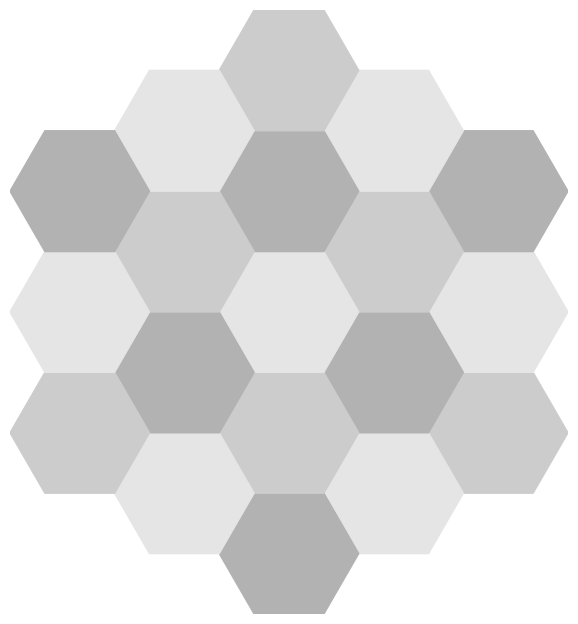

In [3]:
subboard.preview_render(pieces=loaded['pieces'], teams=teams)

In [4]:
subboard.preview_structure(filter=[], filter_blacklist=True, use_pyvis=True, internal_connections=True)

board.html
